In [2]:
# https://www.kaggle.com/jessicali9530/honey-production
# get data set from here

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#read Honey production Dataset
hp=pd.read_csv('C:/Users/hp\Downloads\Microsoft.SkypeApp_kzf8qxf38zg5c!App/All\honeyproduction.csv')

In [5]:
hp.shape

(626, 8)

In [6]:
hp.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [7]:
hp.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [8]:
#summarize hp dataset
hp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
numcol,626.0,6.028435e+04,9.107709e+04,2000.00,9000.0000,26000.00,63750.00,510000.00
yieldpercol,626.0,6.200958e+01,1.945875e+01,19.00,48.0000,60.00,74.00,136.00
totalprod,626.0,4.169086e+06,6.883847e+06,84000.00,475000.0000,1533000.00,4175250.00,46410000.00
stocks,626.0,1.318859e+06,2.272964e+06,8000.00,143000.0000,439500.00,1489500.00,13800000.00
priceperlb,626.0,1.409569e+00,6.385989e-01,0.49,0.9325,1.36,1.68,4.15
prodvalue,626.0,4.715741e+06,7.976110e+06,162000.00,759250.0000,1841500.00,4703250.00,69615000.00
year,626.0,2.004864e+03,4.317306e+00,1998.00,2001.0000,2005.00,2009.00,2012.00


In [9]:
# Creating summary table to understand the trend using year variable
hp_year=hp[['numcol','totalprod','year','yieldpercol','stocks','prodvalue']].groupby('year').sum()
#.groupby("year").sum()
hp_year.head()

,numcol,totalprod,yieldpercol,stocks,prodvalue
year,,,,,
1998,2621000.0,219519000.0,3008,80565000.0,146091000.0
1999,2637000.0,202387000.0,2815,78390000.0,123657000.0
2000,2604000.0,219558000.0,2906,84956000.0,131568000.0
2001,2542000.0,185748000.0,2840,64764000.0,132282000.0
2002,2565000.0,171265000.0,2939,39177000.0,227302000.0


In [10]:
# Resetting index value

hp_year.reset_index(inplace=True)
hp_year.head()

,year,numcol,totalprod,yieldpercol,stocks,prodvalue
0,1998,2621000.0,219519000.0,3008,80565000.0,146091000.0
1,1999,2637000.0,202387000.0,2815,78390000.0,123657000.0
2,2000,2604000.0,219558000.0,2906,84956000.0,131568000.0
3,2001,2542000.0,185748000.0,2840,64764000.0,132282000.0
4,2002,2565000.0,171265000.0,2939,39177000.0,227302000.0


In [11]:
hp

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
...,...,...,...,...,...,...,...,...
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012


Text(0, 0.5, 'yield per colony')

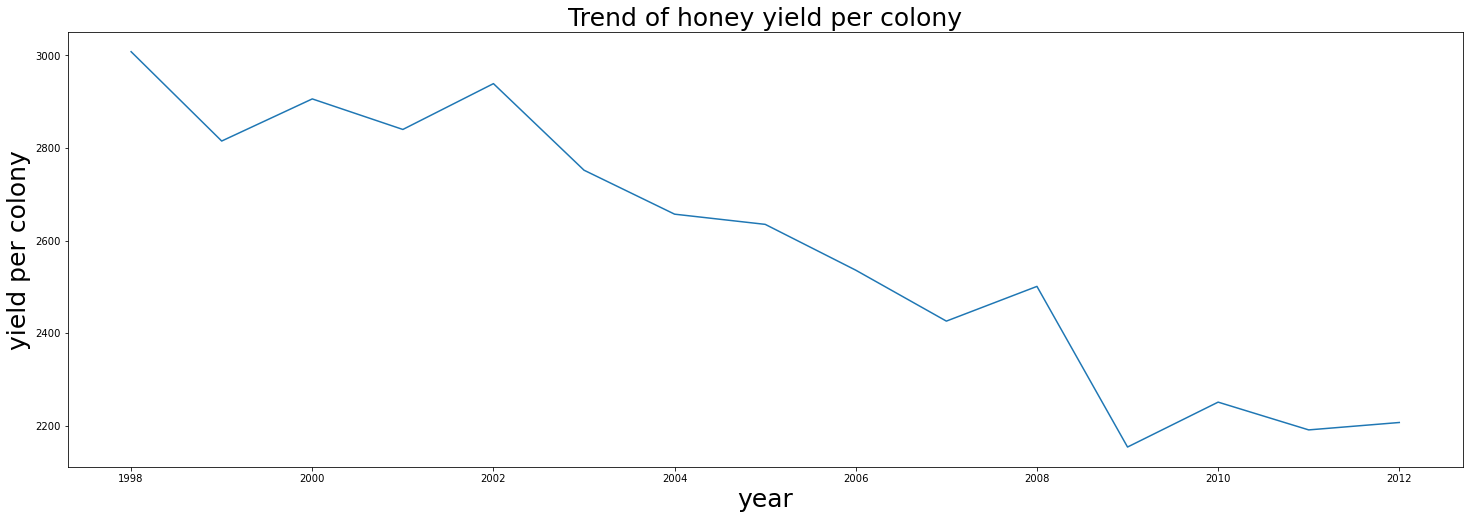

In [12]:
#Visualizing the tred of yield per colony from year 1998 to 2012
plt.figure(figsize=(25,8))
plt.plot(hp_year['year'],hp_year["yieldpercol"])
plt.title("Trend of honey yield per colony",fontsize=25)
plt.xlabel('year',fontsize=25)
plt.ylabel('yield per colony',fontsize=25)

Text(0, 0.5, 'total production of honey (lbs.)')

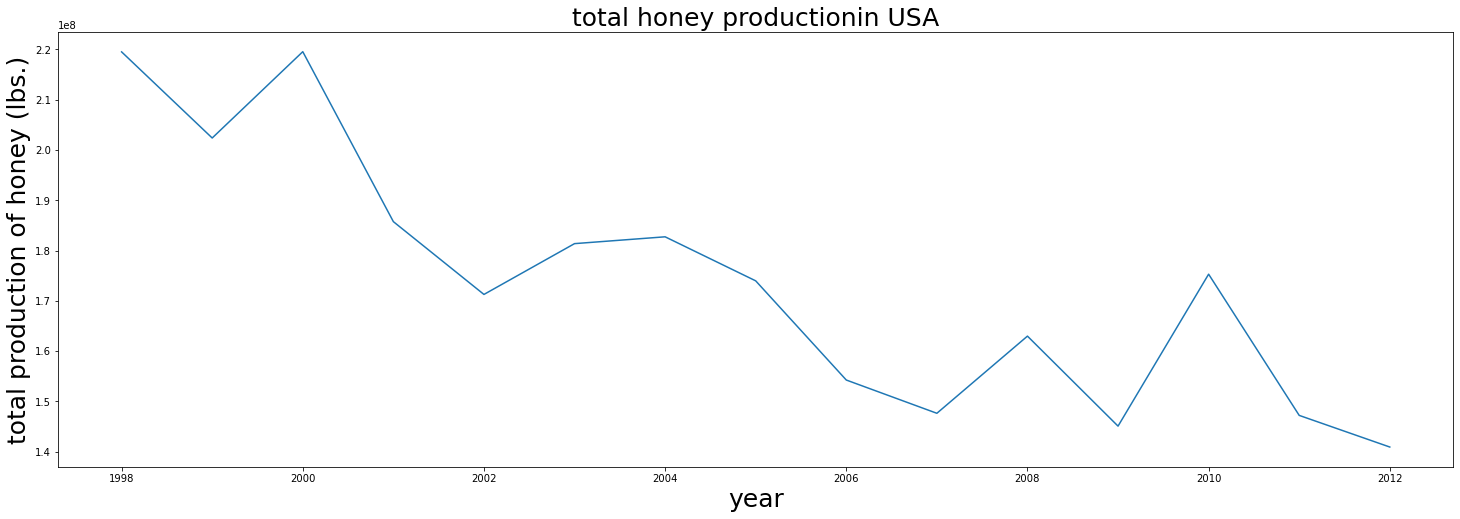

In [13]:
# Visualizing the total honey production from the year 1998 to 2012.
plt.figure(figsize=(25,8))
plt.plot(hp_year['year'],hp_year["totalprod"])
plt.title("total honey productionin USA",fontsize=25)
plt.xlabel('year',fontsize=25)
plt.ylabel("total production of honey (lbs.)",fontsize=25)


In [14]:
# Group the dataset by states and using sum method to get the total honey production value descending order. 

US_state = hp[['state','totalprod','yieldpercol']].groupby('state').sum()
US_state.reset_index(level=0,inplace=True)
US_state.sort_values(by='totalprod',ascending=False,inplace=True)
US_state.head()

,state,totalprod,yieldpercol
23,ND,475085000.0,1321
3,CA,347535000.0,837
34,SD,266141000.0,1137
5,FL,247048000.0,1246
21,MT,156562000.0,1160


Text(0, 0.5, 'Total Production of Honey in USA')

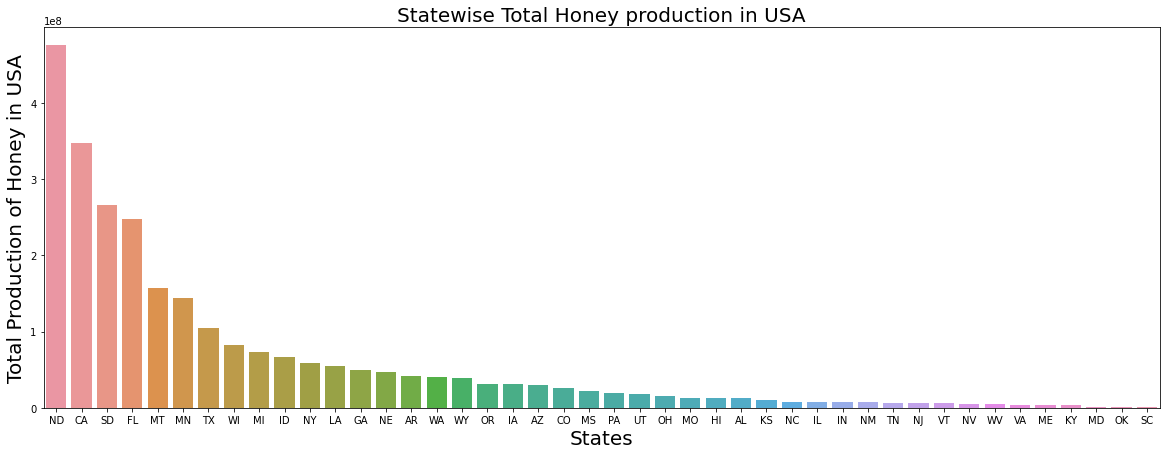

In [15]:
#Creating a Bar chart to visualize the total honey production by states.

plt.figure(figsize=(20,7))
sns.barplot(x=US_state['state'],y = US_state['totalprod'])
plt.title('Statewise Total Honey production in USA',fontsize =20)
plt.xlabel('States',fontsize=20)
plt.ylabel('Total Production of Honey in USA',fontsize=20)

In [16]:
# Creating a table to find out maximum production value from the states

US_state_max = hp[['state','totalprod']].groupby('state').max()
US_state_max.reset_index(level=0,inplace=True)
US_state_max.columns = ['State','Max Prod']
US_state_max.head()

,State,Max Prod
0,AL,1248000.0
1,AR,4900000.0
2,AZ,3300000.0
3,CA,37350000.0
4,CO,2700000.0


In [17]:
# Creating a table to find out minimum production value from the states

US_state_min = hp[['state','totalprod']].groupby('state').min()
US_state_min.reset_index(level=0,inplace=True)
US_state_min.columns = ['State','Min Prod']
US_state_min.head()

,State,Min Prod
0,AL,432000.0
1,AR,1368000.0
2,AZ,1012000.0
3,CA,11550000.0
4,CO,1200000.0


In [18]:
# Merging the Max Prod and Min Prod varible to find the range.

st_range = pd.merge(US_state_max,US_state_min,how='inner',on='State')
st_range.head()

,State,Max Prod,Min Prod
0,AL,1248000.0,432000.0
1,AR,4900000.0,1368000.0
2,AZ,3300000.0,1012000.0
3,CA,37350000.0,11550000.0
4,CO,2700000.0,1200000.0


In [19]:
#Create a Per_Change Column in the st_range dataset to understand honey production changes by states.


st_range['Per_Change'] = ((st_range['Max Prod']-st_range['Min Prod'])/st_range['Max Prod'])*100
st_range.sort_values(by='Per_Change',ascending=False,inplace=True)
st_range.head()

,State,Max Prod,Min Prod,Per_Change
19,MO,1725000.0,344000.0,80.057971
26,NM,960000.0,246000.0,74.375000
16,ME,451000.0,120000.0,73.392461
15,MD,308000.0,84000.0,72.727273
12,KS,1120000.0,308000.0,72.500000


Text(0, 0.5, '% Decline')

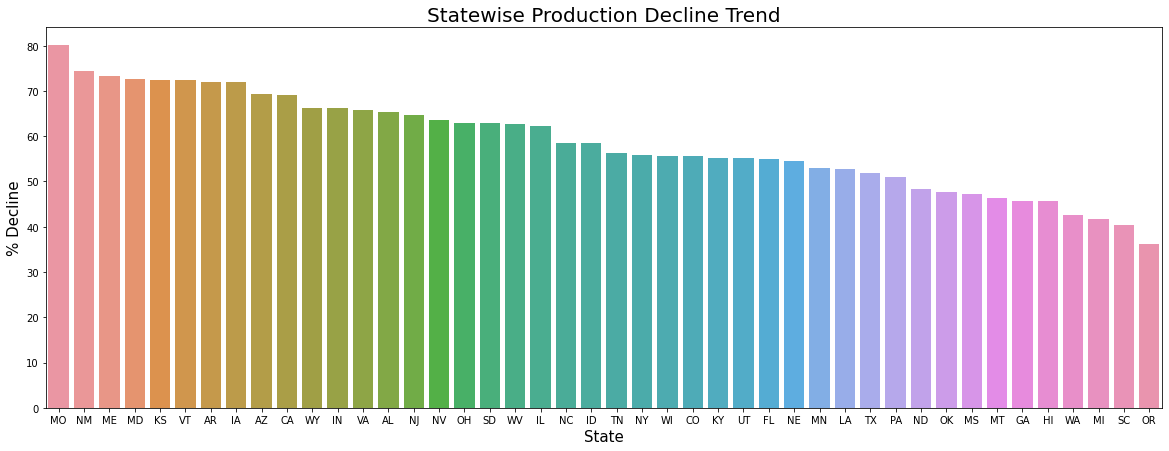

In [20]:
#Create a Bar chart to visualize the statewise decline trend.

plt.figure(figsize=(20,7))
sns.barplot(x='State',y='Per_Change',data= st_range)
plt.title('Statewise Production Decline Trend',fontsize=20)
plt.xlabel("State",fontsize=15)
plt.ylabel("% Decline",fontsize=15)

In [21]:
#Checking the correlation between variables
honey_corr = hp[['numcol','totalprod','year','yieldpercol','stocks','prodvalue']].corr()

honey_corr

,numcol,totalprod,year,yieldpercol,stocks,prodvalue
numcol,1.000000,0.953594,0.008709,0.243515,0.825929,0.912796
totalprod,0.953594,1.000000,-0.055556,0.396252,0.878830,0.907236
year,0.008709,-0.055556,1.000000,-0.232092,-0.119602,0.139451
yieldpercol,0.243515,0.396252,-0.232092,1.000000,0.367812,0.278977
stocks,0.825929,0.878830,-0.119602,0.367812,1.000000,0.728560
prodvalue,0.912796,0.907236,0.139451,0.278977,0.728560,1.000000


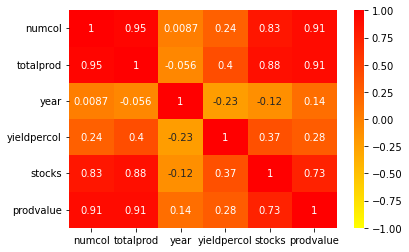

In [28]:
#Visualizing the same in Heatmap()
sns.heatmap(honey_corr, annot = True, vmin = -1, vmax = 1, cmap="autumn_r")
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(hp.drop(['totalprod', 'state'],axis=1), 
                                                    hp['totalprod'], test_size=0.20, 
                                                    random_state=8)

In [25]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
accuracy = model.score(X_test, y_test)
print(accuracy*100,'%')

95.25114307238432 %
